## OPTICS

**OPTICS** algorithm is very similar to **DBSCAN** algorithm. Its basic idea is similar to **DBSCAN**, but it addresses one of **DBSCAN's** major weaknesses: the problem of detecting meaningful clusters in data of varying density. To do so, the points of the database are (linearly) ordered such that spatially closest points become neighbors in the ordering. In the notebook we will apply OPTICS algorithm.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import OPTICS
from sklearn.cluster import DBSCAN

%matplotlib inline

In [2]:
n_points_per_cluster = 250

C1 = [-5, -2] + .1 * np.random.randn(n_points_per_cluster, 2)
y1 = np.ones(shape=n_points_per_cluster)
C2 = [4, -1] + 1.2 * np.random.randn(n_points_per_cluster, 2)
y2 = np.ones(shape=n_points_per_cluster) + 1
C3 = [1, -2] + .2 * np.random.randn(n_points_per_cluster, 2)
y3 = np.ones(shape=n_points_per_cluster) + 2
C4 = [-2, 3] + .4 * np.random.randn(n_points_per_cluster, 2)
y4 = np.ones(shape=n_points_per_cluster) + 3
C5 = [-2, -2] + .6 * np.random.randn(n_points_per_cluster, 2)
y5 = np.ones(shape=n_points_per_cluster) + 4
C6 = [5, 6] + .01 * np.random.randn(n_points_per_cluster, 2)
y6 = np.ones(shape=n_points_per_cluster) + 5
X = np.vstack((C1, C2, C3, C4, C5, C6))
y = np.hstack((y1,y2,y3,y4,y5,y6))
y= y.astype('int')

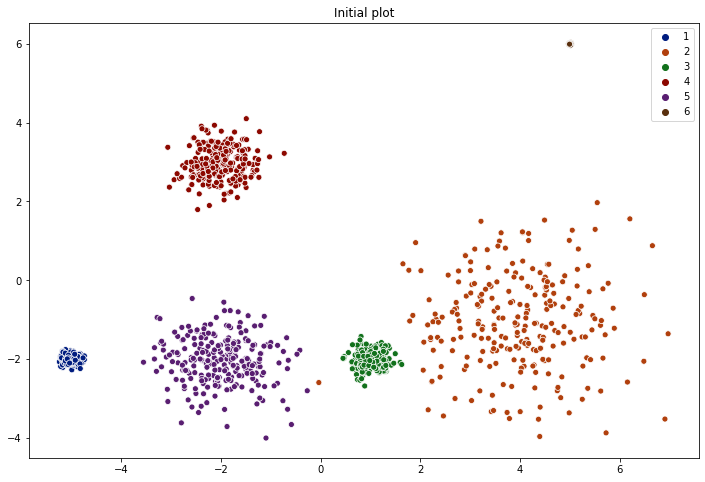

In [3]:
plt.figure(figsize=(12,8))
plt.title('Initial plot')
sns.scatterplot(X[:,0], X[:,1], hue=y, palette='dark')

Here the clusters have different densities. Lets apply **DBSCAN** to the data.

In [4]:
dbscan = DBSCAN(eps=0.3, min_samples=10)

In [5]:
y_dbscan = dbscan.fit_predict(X)

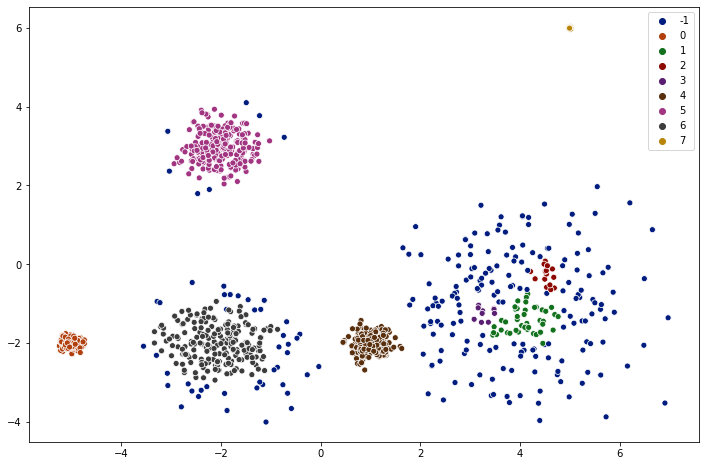

In [6]:
plt.figure(figsize=(12,8))
sns.scatterplot(X[:,0], X[:,1], hue=y_dbscan, palette='dark')

**DBSCAN** fails to identify the cluster with very low density. Lets apply **OPTICS** to the data.

In [7]:
optics = OPTICS(min_samples=20, xi=.1, min_cluster_size=.05)

In [8]:
y_optics = optics.fit_predict(X)

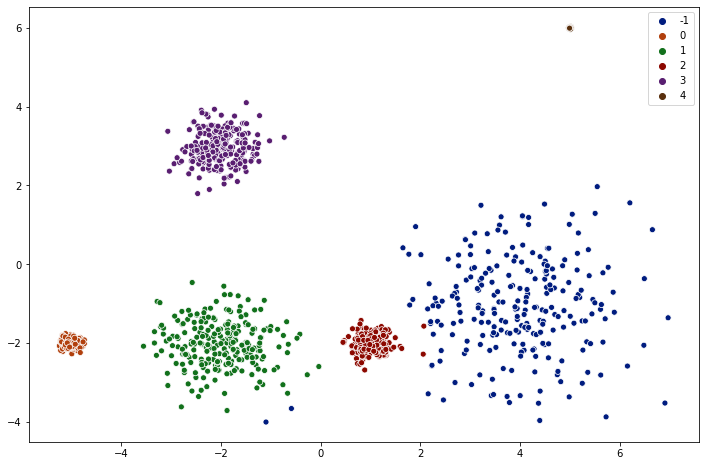

In [9]:
plt.figure(figsize=(12,8))
sns.scatterplot(X[:,0], X[:,1], hue=y_optics, palette='dark')

**OPTICS** did a better job in identifying diffuse clusters, but still not perfect.